# Customer Loan Prediction with GUI interface Project

# Name:  Muhammad Owais


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.shape

(614, 13)

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Checking null values 
### and then fill the null values

In [9]:
# sum all the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df.isnull().sum()*100/len(df)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [11]:
df = df.drop(columns=['Loan_ID'])

In [12]:
columns = ['Gender', 'Dependents', 'LoanAmount', 'Loan_Amount_Term']
df = df.dropna(subset=columns)

In [13]:
df.shape

(553, 12)

In [14]:
df[['Credit_History', 'Self_Employed']]

,Credit_History,Self_Employed
1,1.0,No
2,1.0,Yes
3,1.0,No
4,1.0,No
5,1.0,Yes
...,...,...
609,1.0,No
610,1.0,No
611,1.0,No
612,1.0,No


In [15]:
pd.crosstab(df['Credit_History'], df['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,64,7,71
1.0,88,346,434
All,152,353,505


In [16]:
# now filling the null value in all columns
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [17]:
df.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
10,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y


In [18]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Data Preprocessing

In [19]:
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
537,Male,No,2,Graduate,No,3617,0.0,107.0,360.0,1.0,Semiurban,Y
199,Male,No,0,Graduate,Yes,11000,0.0,83.0,360.0,1.0,Urban,N
119,Female,No,0,Graduate,No,10408,0.0,259.0,360.0,1.0,Urban,Y
61,Male,Yes,3+,Graduate,No,3029,0.0,99.0,360.0,1.0,Urban,Y
372,Male,Yes,2,Graduate,Yes,9323,7873.0,380.0,300.0,1.0,Rural,Y


In [20]:
df['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [21]:
df['Dependents'] = df['Dependents'].replace(to_replace='3+', value='4')
df['Dependents'].unique()

array(['1', '0', '2', '4'], dtype=object)

In [22]:
df['Married'].unique()

array(['Yes', 'No'], dtype=object)

In [23]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [24]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
df['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [26]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [27]:
# converting string column into integer
df['Gender'] = df['Gender'].map({"Male": 1, "Female": 0}).astype('int')
df['Married'] = df['Married'].map({"Yes": 1, "No":0}).astype('int')
df['Education'] = df['Education'].map({"Graduate": 1, "Not Graduate":0}).astype('int')
df['Self_Employed'] = df['Self_Employed'].map({ "Yes": 1, "No": 0}).astype('int')
df['Property_Area'] = df['Property_Area'].map({"Rural": 0, "Urban": 1, "Semiurban": 2}).astype('int')
df['Loan_Status'] = df['Loan_Status'].map({"Y":1,"N":0}).astype('int')

In [28]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


# visualization after fill null values

<Axes: >

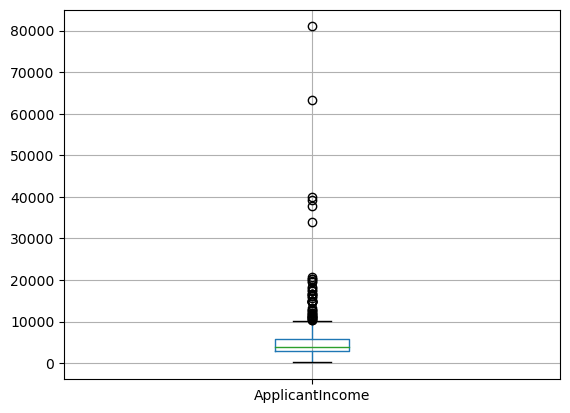

In [29]:
df.boxplot(column='ApplicantIncome')

<Axes: >

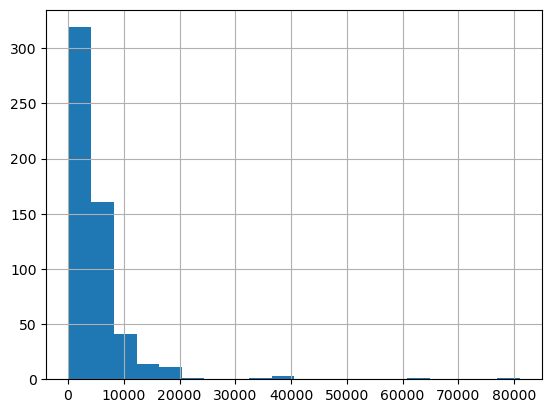

In [30]:
df['ApplicantIncome'].hist(bins=20)

<Axes: >

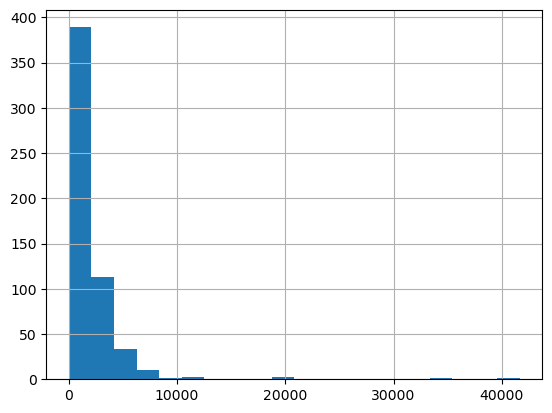

In [31]:
df['CoapplicantIncome'].hist(bins=20)

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

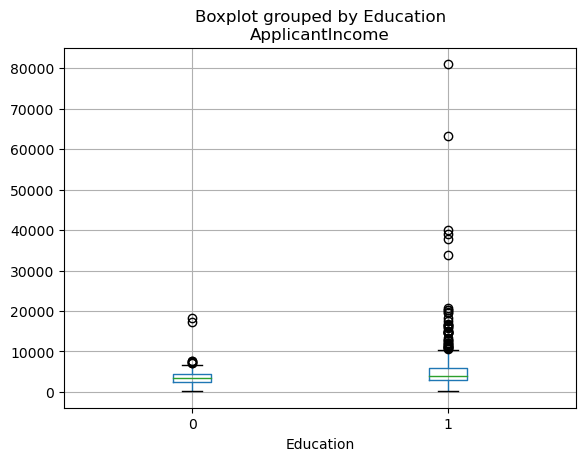

In [32]:
df.boxplot(column='ApplicantIncome', by='Education')

<Axes: >

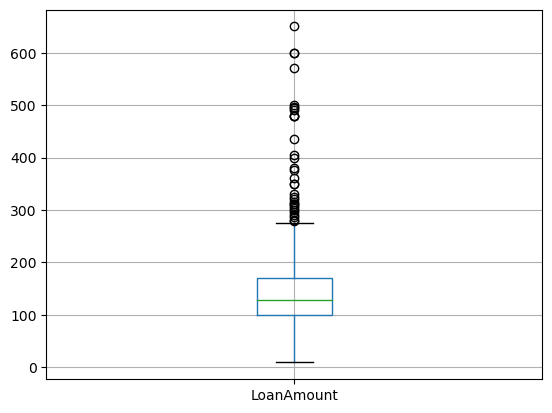

In [33]:
df.boxplot(column='LoanAmount')

<Axes: >

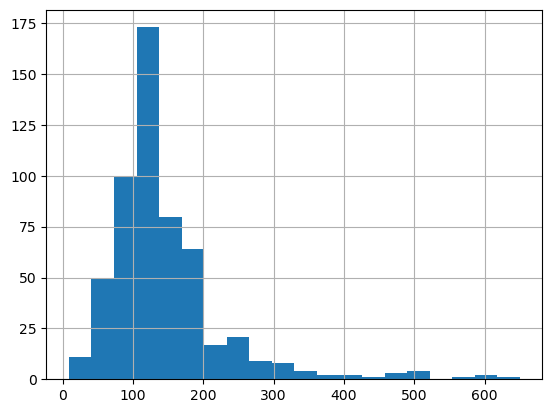

In [34]:
df['LoanAmount'].hist(bins=20)

C:\Users\Hamza\AppData\Local\Temp\ipykernel_2324\3907731128.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_map = df.corr()


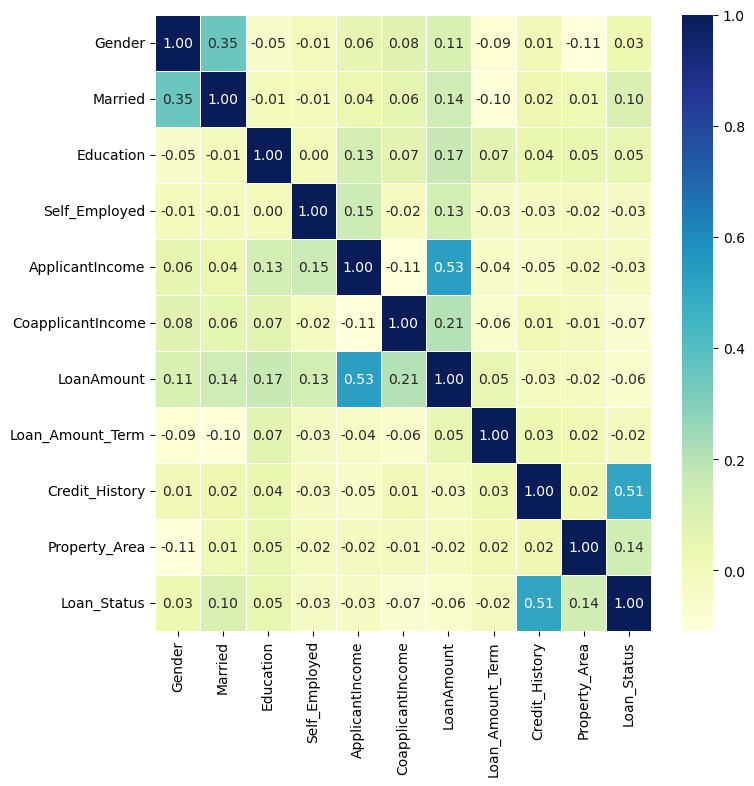

In [35]:
# lets draw correlation map
corr_map = df.corr()
home, room = plt.subplots(figsize = (8,8))
room = sns.heatmap(
    corr_map,
    annot = True,
    linewidths = 0.5,
    fmt = '0.2f',
    cmap = 'YlGnBu',
)

In [36]:
X= df.drop(columns=['Loan_Status'])
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1


In [37]:
y = df['Loan_Status']
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 553, dtype: int32

In [38]:
columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X[columns]=ss.fit_transform(X[columns])

###  Train and test the dataset and Apply algorithms

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score

In [40]:
model_df = {}

def model_val (model_no,X,y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model_no.fit(x_train, y_train)
    y_pred = model_no.predict(x_test)
    print(f"{model_no} has accuracy score of {accuracy_score (y_test,y_pred)}")
    score = cross_val_score (model_no, X, y, cv=5)
    print(score)
    print(f"{model_no} has average cross validation score is {np.mean (score)}")
    model_df[model_no] = round(np. mean (score)*100, 2)

### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model_val(model, X, y)

LogisticRegression() has accuracy score of 0.7927927927927928
[0.8018018  0.78378378 0.78378378 0.84545455 0.80909091]
LogisticRegression() has average cross validation score is 0.8047829647829647


### Support Vector Machine

In [42]:
from sklearn import svm

model = svm.SVC()
model_val(model, X, y)

SVC() has accuracy score of 0.7927927927927928
[0.8018018  0.78378378 0.77477477 0.81818182 0.79090909]
SVC() has average cross validation score is 0.7938902538902539


### Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model_val(model, X, y)

DecisionTreeClassifier() has accuracy score of 0.7657657657657657
[0.72972973 0.68468468 0.67567568 0.69090909 0.74545455]
DecisionTreeClassifier() has average cross validation score is 0.7052907452907453


### Random Forest CLassifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model_val(model, X, y)

RandomForestClassifier() has accuracy score of 0.7747747747747747
[0.76576577 0.74774775 0.79279279 0.79090909 0.8       ]
RandomForestClassifier() has average cross validation score is 0.7794430794430796


### Gradient Boosting Classifier

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model_val(model, X, y)

GradientBoostingClassifier() has accuracy score of 0.8018018018018018
[0.79279279 0.73873874 0.79279279 0.79090909 0.75454545]
GradientBoostingClassifier() has average cross validation score is 0.7739557739557739


In [46]:
model_df

{LogisticRegression(): 80.48,
 SVC(): 79.39,
 DecisionTreeClassifier(): 70.53,
 RandomForestClassifier(): 77.94,
 GradientBoostingClassifier(): 77.4}

### Hyper_Parameter
### Rendomized Search CV

### HyperParameter of Logistic Regression

In [47]:
from sklearn.model_selection import RandomizedSearchCV
log_reg_grid = {
    'C' : np.logspace(-4, 4, num=20),
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid)
rs_log_reg

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']})

In [48]:
rs_log_reg.fit(X , y)

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']})

In [49]:
rs_log_reg.best_estimator_

LogisticRegression(C=0.615848211066026, solver='sag')

In [50]:
rs_log_reg.best_score_

0.8047829647829647

### HyperParameter of Support Vector Machine

In [51]:
svc_grid = {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']}
rs_grid = RandomizedSearchCV(svm.SVC(), param_distributions=svc_grid, n_iter=5, cv=5, verbose=True)
rs_grid

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=5,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1],
                                        'kernel': ['linear']},
                   verbose=True)

In [52]:
#grid_search.best_estimator_

In [53]:
#grid_search.best_score_

### Hypermeter of Random Forest Classifier

In [54]:
rf_grid={
    'n_estimators' : np.arange(10, 1000, 10), 
    'max_features': ['auto', 'sqrt'], 
    'max_depth': [None,3,5,10,30], 
    'min_samples_split': [2,5,20,50,100], 
    "min_samples_leaf" : [1,5,10,15]
}
rff_grid = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, n_iter=5, cv=5, verbose=True)
rff_grid

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 5, 10, 15],
                                        'min_samples_split': [2, 5, 20, 50,
                                                              100],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])},
                   verbose=True)

In [55]:
rff_grid.fit(X, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Hamza\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Hamza\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Hamza\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Hamza\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 5, 10, 15],
                                        'min_samples_split': [2, 5, 20, 50,
                                                              100],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])},
                   verbose=True)

In [56]:
rff_grid.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=250)

In [57]:
rff_grid.best_score_

0.8066011466011467

## Algorithm Without Hyper-Parameters

## Algorithm With Hyper-Parameters

## Now selecting the best accuracy model is Random Forest Classifier

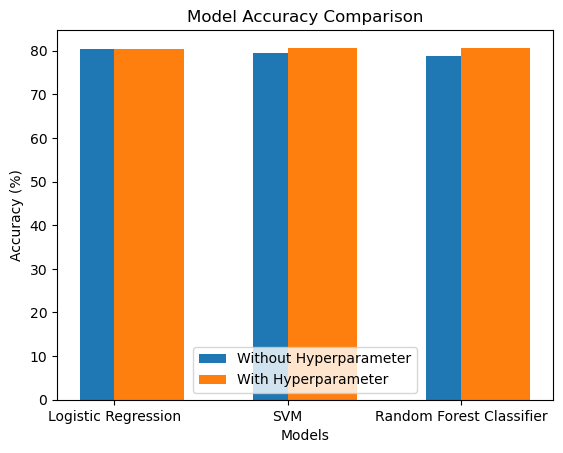

In [58]:
# Accuracy values from your code
without_hyperparameter = {
    'Logistic Regression': 80.48,
    'SVM': 79.39,
    'Random Forest Classifier': 78.67
}

with_hyperparameter = {
    'Logistic Regression': 80.48,  
    'SVM': 80.66,
    'Random Forest Classifier': 80.66
}

models = list(without_hyperparameter.keys())
accuracy_without_hp = list(without_hyperparameter.values())
accuracy_with_hp = list(with_hyperparameter.values())

x = range(len(models))

plt.bar(x, accuracy_without_hp, width=0.4, label='Without Hyperparameter')
plt.bar(x, accuracy_with_hp, width=0.4, label='With Hyperparameter', align='edge')

plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.xticks(x, models)
plt.legend()

plt.show()


In [59]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,-0.128694,-0.049699,-0.214368,0.279961,1.0,0
2,1,1,0,1,1,-0.394296,-0.545638,-0.952675,0.279961,1.0,1
3,1,1,0,0,0,-0.464262,0.229842,-0.309634,0.279961,1.0,1
4,1,0,0,1,0,0.109057,-0.545638,-0.059562,0.279961,1.0,1
5,1,1,2,1,1,0.011239,0.834309,1.440866,0.279961,1.0,1


In [60]:
y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int32

In [61]:
RFC = RandomForestClassifier(
    max_depth=3, 
    max_features='sqrt', 
    min_samples_leaf=15, 
    min_samples_split=5,
    n_estimators=730
)
rf = RFC.fit(X, y)

In [62]:
rf

RandomForestClassifier(max_depth=3, min_samples_leaf=15, min_samples_split=5,
                       n_estimators=730)

In [63]:
import joblib

In [64]:
joblib.dump(rf, 'loan_prediction')

['loan_prediction']

In [65]:
model = joblib.load('loan_prediction')
model

RandomForestClassifier(max_depth=3, min_samples_leaf=15, min_samples_split=5,
                       n_estimators=730)

In [66]:
result = model.predict([[1, 1, 2, 0, 0, -0.128694, -0.049699, -0.214368, 0.279961, 0, 1]])
result

C:\Users\Hamza\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [67]:
if result==0:
    print("Loan is not Approved")
else:
    print("Loan is Approved")

Loan is not Approved


###### After run the above cell GUI interface will show and put new customer data to predict loan approval weather its approved or not

In [71]:
from tkinter import *
import pandas as pd
import joblib

def show_entry():
    # Retrieve inputs as strings
    p1 = e1.get()
    p2 = e2.get()
    p3 = e3.get()
    p4 = e4.get()
    p5 = e5.get()
    p6 = e6.get()
    p7 = e7.get()
    p8 = e8.get()
    p9 = e9.get()
    p10 = e10.get()
    p11 = e11.get()
    
    # Convert string inputs to the appropriate data types
    p1 = 1 if p1.lower() == "male" else 0  # Assuming gender input as "male" or "female"
    p2 = 1 if p2.lower() == "yes" else 0  # Assuming married input as "yes" or "no"
    p3 = 4 if p3 == "3+" else int(p3)  # Handling "3+" dependents case
    p4 = 1 if p4.lower() == "graduate" else 0  # Assuming education input as "graduate" or "not graduate"
    p5 = 1 if p5.lower() == "yes" else 0  # Assuming self-employed input as "yes" or "no"
    p6 = float(p6)  # ApplicantIncome
    p7 = float(p7)  # CoapplicantIncome
    p8 = float(p8)  # LoanAmount
    p9 = float(p9)  # Loan_Amount_Term
    p10 = 1 if p10 == "1" else 0  # Assuming credit history input as "1" or "0"
    p11 = 0 if p11.lower() == "rural" else 1 if p11.lower() == "urban" else 2  # Property area
    
    model = joblib.load('loan_prediction')  # Ensure your model file is named 'loan_prediction.pkl'
    
    df = pd.DataFrame({
        'Gender': [p1],
        'Married': [p2],
        'Dependents': [p3], 
        'Education': [p4],
        'Self_Employed': [p5], 
        'ApplicantIncome': [p6], 
        'CoapplicantIncome': [p7], 
        'LoanAmount': [p8],
        'Loan_Amount_Term': [p9], 
        'Credit_History': [p10],
        'Property_Area': [p11]
    })

    result = model.predict(df)
    
    if result == 1:
        result_label.config(text="Loan Approved")
    else:
        result_label.config(text="Loan Not Approved")

master = Tk()
master.title("Loan Status Prediction Using Machine Learning")

Label(master, text="Loan Status Prediction", bg="black", fg="white").grid(row=0, columnspan=2)
Label(master, text="Gender [Male/Female]").grid(row=1)
Label(master, text="Married [Yes/No]").grid(row=2)
Label(master, text="Dependents [0/1/2/3+]").grid(row=3)
Label(master, text="Education [Graduate/Not Graduate]").grid(row=4)
Label(master, text="Self Employed [Yes/No]").grid(row=5)
Label(master, text="Applicant Income").grid(row=6)
Label(master, text="Coapplicant Income").grid(row=7)
Label(master, text="Loan Amount").grid(row=8)
Label(master, text="Loan Amount Term").grid(row=9)
Label(master, text="Credit History [1/0]").grid(row=10)
Label(master, text="Property Area [Rural/Urban/Semiurban]").grid(row=11)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)

Button(master, text="Predict", command=show_entry).grid(row=30, columnspan=2)

result_label = Label(master, text="", fg="red")
result_label.grid(row=31, columnspan=2)

mainloop()
